{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

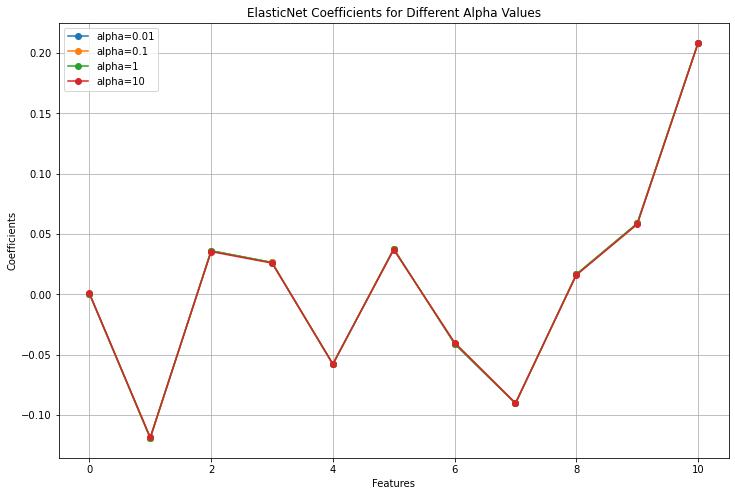

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo 

# Fetch dataset 
wine_quality = fetch_ucirepo(id=186) 

# Data (as pandas dataframes)
X = wine_quality.data.features 
y = wine_quality.data.targets 

# Print metadata and variable information
print(wine_quality.metadata) 
print(wine_quality.variables) 

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for NaN values
print(X_train.isnull().sum())
print(y_train.isnull().sum())

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target to NumPy array and flatten it
y_train_np = y_train.to_numpy().ravel()
y_test_np = y_test.to_numpy().ravel()

def elastic_net_gradient_descent(X, y, alpha, l1_ratio, num_iterations, learning_rate):
    m, n = X.shape
    beta = np.zeros(n)
    for _ in range(num_iterations):
        predictions = X.dot(beta)
        errors = predictions - y  # y is already 1D
        gradient = (X.T.dot(errors) + alpha * ((1 - l1_ratio) * beta + l1_ratio * np.sign(beta))) / m
        beta -= learning_rate * gradient
    return beta

def visualize_elastic_net_coefficients(X, y, alpha_values):
    plt.figure(figsize=(12, 8))
    for alpha in alpha_values:
        beta = elastic_net_gradient_descent(X, y, alpha, l1_ratio=0.5,
                                            num_iterations=1000, learning_rate=0.001)  # Reduced learning rate
        plt.plot(beta, marker='o', label=f'alpha={alpha}')
    
    plt.title('ElasticNet Coefficients for Different Alpha Values')
    plt.xlabel('Features')
    plt.ylabel('Coefficients')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define alpha values to visualize
alpha_values = [0.01, 0.1, 1, 10]
visualize_elastic_net_coefficients(X_train_scaled, y_train_np, alpha_values)